In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Volume

In [2]:
df_volume = pd.read_csv('/content/drive/MyDrive/crops_dataset/volumes_predicted/wheat_vol_df.csv')

In [3]:
df_volume.head()

,Unnamed: 0,time,actual_volume,pred_volume
0,0,2014-01-01,5069367.0,6.125546e+06
1,1,2014-02-01,5514224.0,1.302287e+07
2,2,2014-03-01,26874365.0,1.787987e+08
3,3,2014-04-01,154854829.0,4.457429e+07
4,4,2014-05-01,105823143.0,1.195524e+07


In [4]:
df_volume = df_volume.drop(df_volume.columns[0], axis=1)

In [5]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,5069367.0,6.125546e+06
1,2014-02-01,5514224.0,1.302287e+07
2,2014-03-01,26874365.0,1.787987e+08
3,2014-04-01,154854829.0,4.457429e+07
4,2014-05-01,105823143.0,1.195524e+07
...,...,...,...
121,2024-02-01,NaN,3.677527e+07
122,2024-03-01,NaN,2.010513e+08
123,2024-04-01,NaN,6.626050e+07
124,2024-05-01,NaN,3.350502e+07


In [6]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           126 non-null    object 
 1   actual_volume  78 non-null     float64
 2   pred_volume    126 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Loading the Price

In [7]:
df_price = pd.read_csv('/content/drive/MyDrive/crops_dataset/wheat.csv')

In [8]:
df_price.head(5)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014,Andhra Pradesh
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014,Andhra Pradesh


In [9]:
# Now we only focus on the price part, removing the other columns

df_price = df_price[['Price Date','Modal Price (Rs./Quintal)']]

In [10]:
df_price = df_price.rename(columns={"Price Date": "Date", "Modal Price (Rs./Quintal)": "price"})

In [11]:
df_price

,Date,price
0,27-06-2009,1500.0
1,13-05-2014,1653.0
2,12-05-2014,1530.0
3,10-05-2014,1550.0
4,20-03-2014,1579.0
...,...,...
470542,16-06-2012,1350.0
470543,15-06-2012,1400.0
470544,14-06-2012,1325.0
470545,13-06-2012,1300.0


In [12]:
# Convert 'Date' column to datetime format
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%d-%m-%Y')

# Extract year and month from 'Date' column
df_price['YearMonth'] = df_price['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate average price
df_price_avg = df_price.groupby('YearMonth')['price'].mean().reset_index()

# Set day of the date to 01
df_price_avg['Date'] = df_price_avg['YearMonth'].dt.strftime('01-%m-%Y')

# Drop the 'YearMonth' column
df_price_avg = df_price_avg.drop('YearMonth', axis=1)

# Print the average price DataFrame
df_price_avg

,price,Date
0,989.385523,01-04-2008
1,1004.712560,01-05-2008
2,1100.662102,01-06-2008
3,1140.270073,01-07-2008
4,1145.155420,01-08-2008
...,...,...
163,1970.602612,01-11-2021
164,1988.400078,01-12-2021
165,2007.538043,01-01-2022
166,2007.342128,01-02-2022


In [13]:
df_price_avg = df_price_avg[['Date','price']]

In [14]:
df_price_avg

,Date,price
0,01-04-2008,989.385523
1,01-05-2008,1004.712560
2,01-06-2008,1100.662102
3,01-07-2008,1140.270073
4,01-08-2008,1145.155420
...,...,...
163,01-11-2021,1970.602612
164,01-12-2021,1988.400078
165,01-01-2022,2007.538043
166,01-02-2022,2007.342128


In [15]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,5069367.0,6.125546e+06
1,2014-02-01,5514224.0,1.302287e+07
2,2014-03-01,26874365.0,1.787987e+08
3,2014-04-01,154854829.0,4.457429e+07
4,2014-05-01,105823143.0,1.195524e+07
...,...,...,...
121,2024-02-01,NaN,3.677527e+07
122,2024-03-01,NaN,2.010513e+08
123,2024-04-01,NaN,6.626050e+07
124,2024-05-01,NaN,3.350502e+07


In [16]:
# Extract year from 'Date' column
df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year

# Group by 'Year' and calculate the average price for the first half of each month
df_avg_yearly = df_price_avg.groupby('Year')['price'].mean().reset_index()

# Rename the columns
df_avg_yearly.columns = ['Date', 'price']



<ipython-input-16-adbe30befa55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year


In [17]:
# Print the average prices for each year
df_avg_yearly

,Date,price
0,2008,1098.352825
1,2009,1231.739925
2,2010,1339.144724
3,2011,1318.375413
4,2012,1457.316996
5,2013,1682.555499
6,2014,1726.677400
7,2015,1764.730000
8,2016,1912.987139
9,2017,1855.009946


In [18]:
# Convert 'time' column to datetime format
df_volume['time'] = pd.to_datetime(df_volume['time'])

# Extract year from 'time' column
df_volume['Year'] = df_volume['time'].dt.year

# Calculate the average actual volume and pred volume for each year
df_volavg_yearly = df_volume.groupby('Year').agg({'actual_volume': 'mean', 'pred_volume': 'mean'}).reset_index()

# Rename the columns
df_volavg_yearly.columns = ['Date', 'Average Actual Volume', 'Average Pred Volume']



In [19]:
# Print the average values for each year
df_volavg_yearly

,Date,Average Actual Volume,Average Pred Volume
0,2014,3.157194e+07,2.751328e+07
1,2015,3.076207e+07,3.034545e+07
2,2016,2.345280e+07,3.196180e+07
3,2017,2.639544e+07,3.434437e+07
4,2018,2.649914e+07,3.624406e+07
5,2019,2.207356e+07,3.844807e+07
6,2020,4.547850e+07,4.046029e+07
7,2021,NaN,4.259338e+07
8,2022,NaN,4.465029e+07
9,2023,NaN,4.675522e+07


# Getting MSP

In [20]:
import pandas as pd

# Create a DataFrame for MSP
msp_data = {
    'Date': list(range(2008, 2023)),
    'msp': [1080,1100,1170,1285,1350,1400,1450, 1525, 1625, 1735, 1840, 1925, 1975, 2015, 2125]
}

df_msp = pd.DataFrame(msp_data)

# Print the MSP DataFrame



In [21]:
df_msp

,Date,msp
0,2008,1080
1,2009,1100
2,2010,1170
3,2011,1285
4,2012,1350
5,2013,1400
6,2014,1450
7,2015,1525
8,2016,1625
9,2017,1735


In [22]:
crop_price_df = pd.merge(df_avg_yearly, df_msp, on='Date')

In [23]:
crop_price_df

,Date,price,msp
0,2008,1098.352825,1080
1,2009,1231.739925,1100
2,2010,1339.144724,1170
3,2011,1318.375413,1285
4,2012,1457.316996,1350
5,2013,1682.555499,1400
6,2014,1726.677400,1450
7,2015,1764.730000,1525
8,2016,1912.987139,1625
9,2017,1855.009946,1735


In [24]:
# Calculate the difference between 'msp' and 'price' and add it as a new column
crop_price_df['difference'] = crop_price_df['price'] - crop_price_df['msp']


In [25]:
crop_price_df

,Date,price,msp,difference
0,2008,1098.352825,1080,18.352825
1,2009,1231.739925,1100,131.739925
2,2010,1339.144724,1170,169.144724
3,2011,1318.375413,1285,33.375413
4,2012,1457.316996,1350,107.316996
5,2013,1682.555499,1400,282.555499
6,2014,1726.677400,1450,276.677400
7,2015,1764.730000,1525,239.730000
8,2016,1912.987139,1625,287.987139
9,2017,1855.009946,1735,120.009946


# MSP and Avg_Price

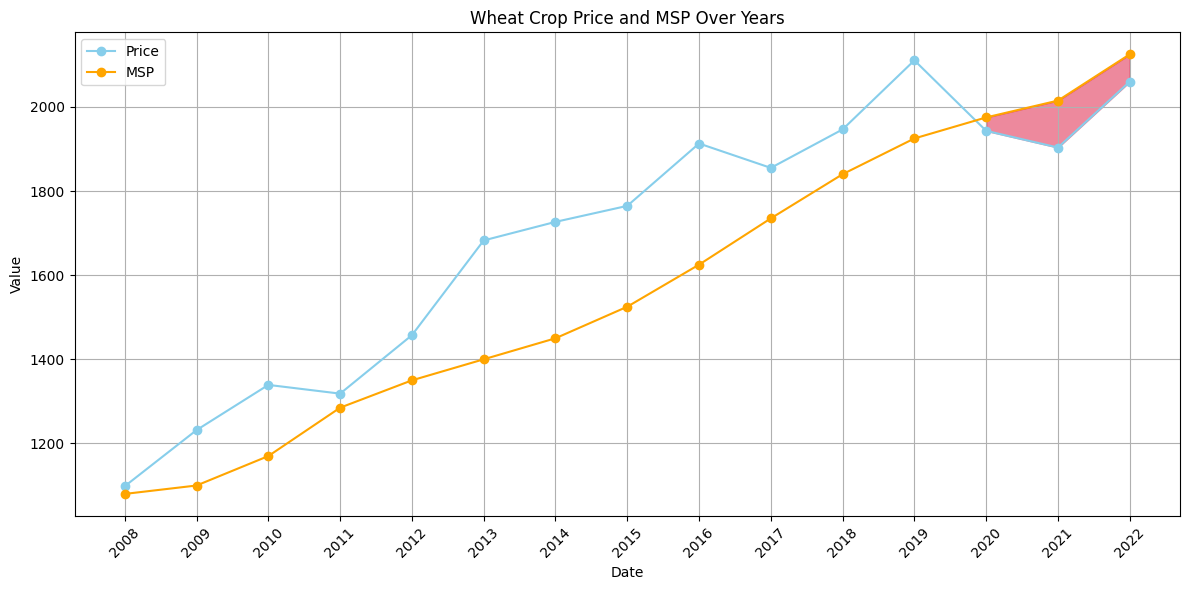

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting 'price' and 'msp' over 'Date'
plt.figure(figsize=(12, 6))
plt.plot(crop_price_df['Date'], crop_price_df['price'], marker='o', color='skyblue', label='Price')
plt.plot(crop_price_df['Date'], crop_price_df['msp'], marker='o', color='orange', label='MSP')

# Shade the region where price is greater than msp
plt.fill_between(crop_price_df['Date'], crop_price_df['price'], crop_price_df['msp'],
                 where=crop_price_df['price'] < crop_price_df['msp'], color='crimson', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Wheat Crop Price and MSP Over Years')
plt.legend()
plt.grid(True)
plt.xticks(crop_price_df['Date'], rotation=45)
plt.tight_layout()
plt.show()


# Liability for the crop

In [27]:
liability_df = pd.merge(df_volavg_yearly, crop_price_df, on='Date', how='inner')



In [28]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference
0,2014,3.157194e+07,2.751328e+07,1726.677400,1450,276.677400
1,2015,3.076207e+07,3.034545e+07,1764.730000,1525,239.730000
2,2016,2.345280e+07,3.196180e+07,1912.987139,1625,287.987139
3,2017,2.639544e+07,3.434437e+07,1855.009946,1735,120.009946
4,2018,2.649914e+07,3.624406e+07,1946.499738,1840,106.499738
5,2019,2.207356e+07,3.844807e+07,2110.654102,1925,185.654102
6,2020,4.547850e+07,4.046029e+07,1943.078236,1975,-31.921764
7,2021,NaN,4.259338e+07,1903.396357,2015,-111.603643
8,2022,NaN,4.465029e+07,2060.084195,2125,-64.915805


In [29]:
# Calculate actual_liability
liability_df['actual_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Actual Volume'] if row['difference'] < 0 else np.nan, axis=1)

# Calculate pred_liability
liability_df['pred_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Pred Volume'] if row['difference'] < 0 else np.nan, axis=1)




In [30]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference,actual_liability,pred_liability
0,2014,3.157194e+07,2.751328e+07,1726.677400,1450,276.677400,NaN,NaN
1,2015,3.076207e+07,3.034545e+07,1764.730000,1525,239.730000,NaN,NaN
2,2016,2.345280e+07,3.196180e+07,1912.987139,1625,287.987139,NaN,NaN
3,2017,2.639544e+07,3.434437e+07,1855.009946,1735,120.009946,NaN,NaN
4,2018,2.649914e+07,3.624406e+07,1946.499738,1840,106.499738,NaN,NaN
5,2019,2.207356e+07,3.844807e+07,2110.654102,1925,185.654102,NaN,NaN
6,2020,4.547850e+07,4.046029e+07,1943.078236,1975,-31.921764,1.451754e+09,1.291564e+09
7,2021,NaN,4.259338e+07,1903.396357,2015,-111.603643,NaN,4.753576e+09
8,2022,NaN,4.465029e+07,2060.084195,2125,-64.915805,NaN,2.898510e+09


In [31]:
# Save the dataframe to a CSV file
liability_df.to_csv('wheat_liability_data.csv', index=False)

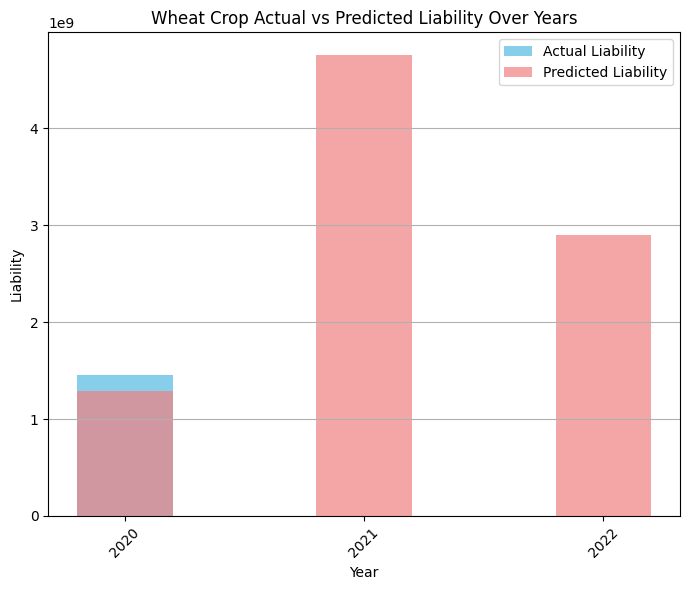

In [32]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability']
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability']
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(7, 6))
plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4,color='skyblue')
plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4,color='lightcoral')  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability')
plt.title('Wheat Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


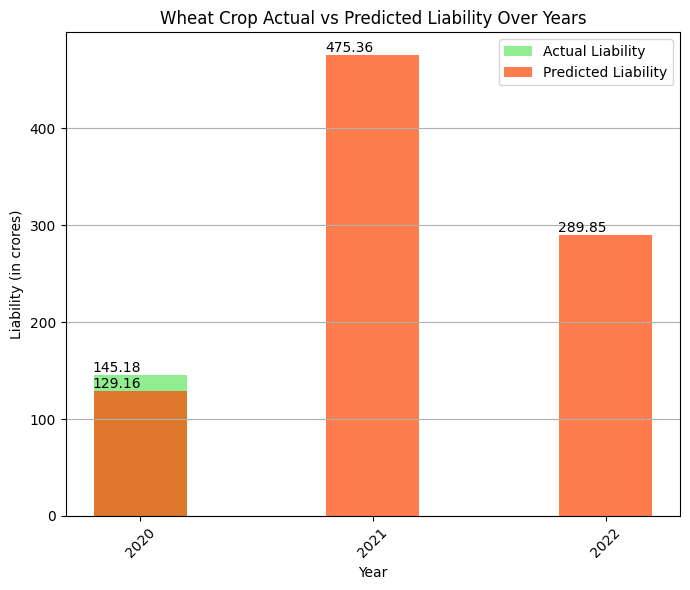

In [33]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability'] / 1e7
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability'] / 1e7
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(7, 6))
bars1 = plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4,color='lightgreen')
bars2 = plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4,color='orangered')  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability (in crores)')
plt.title('Wheat Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)

# Add the liability values on top of the bars
for bar, liability_values in zip(bars1, actual_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{liability_values:.2f}', ha='center', va='bottom')
for bar, liability_values in zip(bars2, pred_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{liability_values:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
